In [1]:
pip install konlpy


from konlpy.tag import Okt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (윈도우용)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install konlpy

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
from konlpy.tag import Okt
import pandas as pd

In [37]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (윈도우용)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [6]:
voc_df = pd.read_csv("./data/voc_data.csv", encoding="utf-8-sig")
voc_df.head()

,VOC_ID,Date,SKU,고객의견,VOC유형,감성점수
0,VOC001,2025-05-11,SKU789,테이프가 제대로 안 붙어 있어요.,포장불량,-0.80
1,VOC002,2025-05-17,SKU789,박스가 찌그러져 도착했어요.,포장불량,-0.88
2,VOC003,2025-05-02,SKU789,생각보다 배송이 느려요.,배송지연,-0.63
3,VOC004,2025-05-04,SKU456,포장이 찢어졌고 제품이 흔들려요.,포장불량,-0.82
4,VOC005,2025-05-27,SKU456,신발에 먼지가 묻어 있었어요.,오염,-0.72


In [7]:
okt = Okt()

In [8]:
stopwords = ["이", "가", "은", "는", "에", "의", "도", "고", "와", "요", "있어요", "없어요", "해서"]

In [9]:
# 전처리 함수
def preprocess_text(text):
    tokens = okt.morphs(text)
    return " ".join([w for w in tokens if w not in stopwords])

# 전처리 적용
voc_df["전처리의견"] = voc_df["고객의견"].apply(preprocess_text)

In [12]:
voc_df

,VOC_ID,Date,SKU,고객의견,VOC유형,감성점수,전처리의견
0,VOC001,2025-05-11,SKU789,테이프가 제대로 안 붙어 있어요.,포장불량,-0.80,테이프 제대로 안 붙어 .
1,VOC002,2025-05-17,SKU789,박스가 찌그러져 도착했어요.,포장불량,-0.88,박스 찌그러져 도착 했어요 .
2,VOC003,2025-05-02,SKU789,생각보다 배송이 느려요.,배송지연,-0.63,생각 보다 배송 느려요 .
3,VOC004,2025-05-04,SKU456,포장이 찢어졌고 제품이 흔들려요.,포장불량,-0.82,포장 찢어졌고 제품 흔들려요 .
4,VOC005,2025-05-27,SKU456,신발에 먼지가 묻어 있었어요.,오염,-0.72,신발 먼지 묻어 있었어요 .
...,...,...,...,...,...,...,...
95,VOC096,2025-05-06,SKU789,깨끗하지 않았어요.,오염,-0.62,깨끗하지 않았어요 .
96,VOC097,2025-04-29,SKU123,일주일 넘게 걸렸어요.,배송지연,-0.79,일주일 넘게 걸렸어요 .
97,VOC098,2025-05-19,SKU456,포장이 찢어졌고 제품이 흔들려요.,포장불량,-0.49,포장 찢어졌고 제품 흔들려요 .
98,VOC099,2025-05-13,SKU456,테이프가 제대로 안 붙어 있어요.,포장불량,-0.83,테이프 제대로 안 붙어 .


In [11]:
voc_df["전처리의견"]

0        테이프 제대로 안 붙어 .
1      박스 찌그러져 도착 했어요 .
2        생각 보다 배송 느려요 .
3     포장 찢어졌고 제품 흔들려요 .
4       신발 먼지 묻어 있었어요 .
            ...        
95          깨끗하지 않았어요 .
96        일주일 넘게 걸렸어요 .
97    포장 찢어졌고 제품 흔들려요 .
98       테이프 제대로 안 붙어 .
99      배송 너무 오래 걸렸어요 .
Name: 전처리의견, Length: 100, dtype: object

In [13]:
# 키워드 사전 기반 유형 분류
keyword_dict = {
    "정가품": ["정품", "가짜", "택", "인증"],
    "오염": ["오염", "얼룩", "먼지", "깨끗"],
    "포장불량": ["포장", "박스", "테이프", "엉망"],
    "배송지연": ["배송", "늦", "지연", "일주일"]
}

In [16]:
def classify_type(text):
    for vtype, keywords in keyword_dict.items():
        if any(k in text for k in keywords):
            return vtype
    return "기타"

voc_df["분류된유형"] = voc_df["전처리의견"].apply(classify_type)

# 결과 확인
voc_df[["VOC_ID", "고객의견", "전처리의견", "VOC유형", "분류된유형"]].head(10)

'''
컬럼명 : 설명
고객의견 : 원문
전처리의견 : 형태소 분석 + 불용어 제거 결과
VOC유형 : 사람이 태깅한 값
분류된유형 : 키워드 사전 기반 분류 결과
'''


,VOC_ID,고객의견,전처리의견,VOC유형,분류된유형
0,VOC001,테이프가 제대로 안 붙어 있어요.,테이프 제대로 안 붙어 .,포장불량,포장불량
1,VOC002,박스가 찌그러져 도착했어요.,박스 찌그러져 도착 했어요 .,포장불량,포장불량
2,VOC003,생각보다 배송이 느려요.,생각 보다 배송 느려요 .,배송지연,배송지연
3,VOC004,포장이 찢어졌고 제품이 흔들려요.,포장 찢어졌고 제품 흔들려요 .,포장불량,포장불량
4,VOC005,신발에 먼지가 묻어 있었어요.,신발 먼지 묻어 있었어요 .,오염,오염
5,VOC006,생각보다 배송이 느려요.,생각 보다 배송 느려요 .,배송지연,배송지연
6,VOC007,상품에 오염이 묻어 있어요.,상품 오염 묻어 .,오염,오염
7,VOC008,박스가 찌그러져 도착했어요.,박스 찌그러져 도착 했어요 .,포장불량,포장불량
8,VOC009,옷에 얼룩이 있어요.,옷 얼룩 .,오염,오염
9,VOC010,상품에 오염이 묻어 있어요.,상품 오염 묻어 .,오염,오염


# 데이터 셋 통합

In [18]:
inspection_df = pd.read_csv("./data/inspection_data.csv", encoding="utf-8-sig")
product_df = pd.read_csv("./data/product_data.csv", encoding="utf-8-sig")

In [28]:
# VOC + 검수 데이터 통합 (SKU + Date 기준)
merged_voc_inspection = pd.merge(
    voc_df, inspection_df, on=["SKU", "Date"], how="left"
)

In [29]:
merged_voc_inspection.head()

,VOC_ID,Date,SKU,고객의견,VOC유형,감성점수,전처리의견,분류된유형,검수ID,검수결과,검수사유
0,VOC001,2025-05-11,SKU789,테이프가 제대로 안 붙어 있어요.,포장불량,-0.80,테이프 제대로 안 붙어 .,포장불량,INSP029,PASS,NaN
1,VOC002,2025-05-17,SKU789,박스가 찌그러져 도착했어요.,포장불량,-0.88,박스 찌그러져 도착 했어요 .,포장불량,NaN,NaN,NaN
2,VOC003,2025-05-02,SKU789,생각보다 배송이 느려요.,배송지연,-0.63,생각 보다 배송 느려요 .,배송지연,NaN,NaN,NaN
3,VOC004,2025-05-04,SKU456,포장이 찢어졌고 제품이 흔들려요.,포장불량,-0.82,포장 찢어졌고 제품 흔들려요 .,포장불량,INSP018,PASS,NaN
4,VOC004,2025-05-04,SKU456,포장이 찢어졌고 제품이 흔들려요.,포장불량,-0.82,포장 찢어졌고 제품 흔들려요 .,포장불량,INSP043,FAIL,택 없음


In [30]:
# 위 결과에 상품 정보 결합 (SKU 기준)
merged_full = pd.merge(
    merged_voc_inspection, product_df, on="SKU", how="left"
)


In [31]:
merged_full.head()

,VOC_ID,Date,SKU,고객의견,VOC유형,감성점수,전처리의견,분류된유형,검수ID,검수결과,검수사유,브랜드,카테고리,매입수량,등록일
0,VOC001,2025-05-11,SKU789,테이프가 제대로 안 붙어 있어요.,포장불량,-0.80,테이프 제대로 안 붙어 .,포장불량,INSP029,PASS,NaN,PUMA,의류,60,2025-04-27
1,VOC002,2025-05-17,SKU789,박스가 찌그러져 도착했어요.,포장불량,-0.88,박스 찌그러져 도착 했어요 .,포장불량,NaN,NaN,NaN,PUMA,의류,60,2025-04-27
2,VOC003,2025-05-02,SKU789,생각보다 배송이 느려요.,배송지연,-0.63,생각 보다 배송 느려요 .,배송지연,NaN,NaN,NaN,PUMA,의류,60,2025-04-27
3,VOC004,2025-05-04,SKU456,포장이 찢어졌고 제품이 흔들려요.,포장불량,-0.82,포장 찢어졌고 제품 흔들려요 .,포장불량,INSP018,PASS,NaN,ADIDAS,신발,80,2025-04-26
4,VOC004,2025-05-04,SKU456,포장이 찢어졌고 제품이 흔들려요.,포장불량,-0.82,포장 찢어졌고 제품 흔들려요 .,포장불량,INSP043,FAIL,택 없음,ADIDAS,신발,80,2025-04-26


In [32]:
# 주요 컬럼 정리
merged_full = merged_full[
    ["VOC_ID", "Date", "SKU", "브랜드", "카테고리", "매입수량",
     "고객의견", "VOC유형", "감성점수", "검수결과", "검수사유"]
]

In [33]:
merged_full.head()

,VOC_ID,Date,SKU,브랜드,카테고리,매입수량,고객의견,VOC유형,감성점수,검수결과,검수사유
0,VOC001,2025-05-11,SKU789,PUMA,의류,60,테이프가 제대로 안 붙어 있어요.,포장불량,-0.80,PASS,NaN
1,VOC002,2025-05-17,SKU789,PUMA,의류,60,박스가 찌그러져 도착했어요.,포장불량,-0.88,NaN,NaN
2,VOC003,2025-05-02,SKU789,PUMA,의류,60,생각보다 배송이 느려요.,배송지연,-0.63,NaN,NaN
3,VOC004,2025-05-04,SKU456,ADIDAS,신발,80,포장이 찢어졌고 제품이 흔들려요.,포장불량,-0.82,PASS,NaN
4,VOC004,2025-05-04,SKU456,ADIDAS,신발,80,포장이 찢어졌고 제품이 흔들려요.,포장불량,-0.82,FAIL,택 없음


## 4. 데이터 분석 및 시각화 (EDA)

- SKU별 VOC 빈도 분석
- 브랜드별 검수 실패율 분석
- VOC 유형별 트렌드 분석

SKU별 VOC 빈도 상위 TOP 5

In [35]:
# SKU별 VOC 건수 계산
sku_voc_count = voc_df["SKU"].value_counts().reset_index()
sku_voc_count.columns = ["SKU", "VOC_건수"]

# 상위 5개 SKU 선택 (더미 데이터는 3개)
top5_sku = sku_voc_count.head(5)

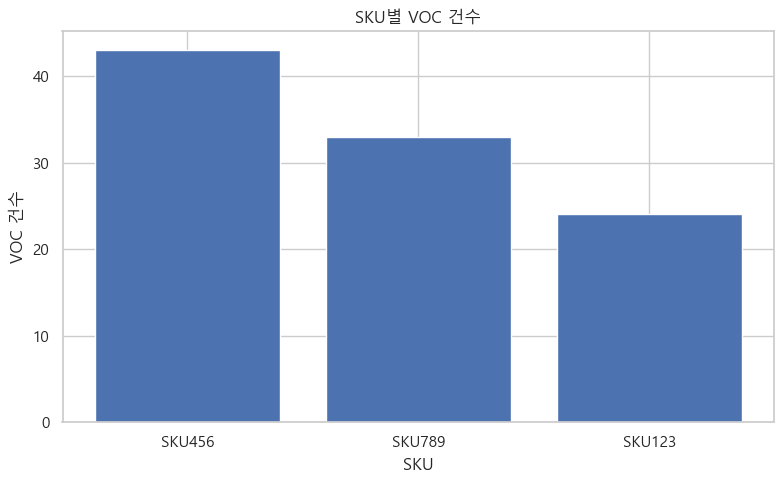

In [39]:
plt.figure(figsize=(8, 5))
plt.bar(top5_sku["SKU"], top5_sku["VOC_건수"])
plt.title("SKU별 VOC 건수")
plt.xlabel("SKU")
plt.ylabel("VOC 건수")
plt.tight_layout()
plt.show()

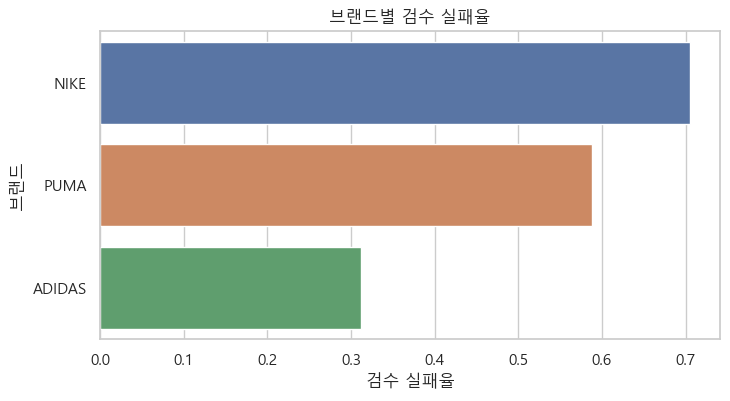

In [47]:
# inspection_df와 product_df 병합
inspection_merged = pd.merge(inspection_df, product_df, on="SKU", how="left")

# 브랜드별 FAIL 비율 계산
brand_fail_rate = (
    inspection_merged.groupby("브랜드")["검수결과"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

brand_fail_rate = brand_fail_rate.get("FAIL", pd.Series(0, index=brand_fail_rate.index)).reset_index()
brand_fail_rate.columns = ["브랜드", "검수 실패율"]

# 상위 5개 브랜드 추출 및 시각화
top_brand_fail = brand_fail_rate.sort_values(by="검수 실패율", ascending=False).head(5)

plt.figure(figsize=(8, 4))
sns.barplot(x="검수 실패율", y="브랜드", data=top_brand_fail)
plt.title("브랜드별 검수 실패율")
plt.show()


<Figure size 1200x600 with 0 Axes>

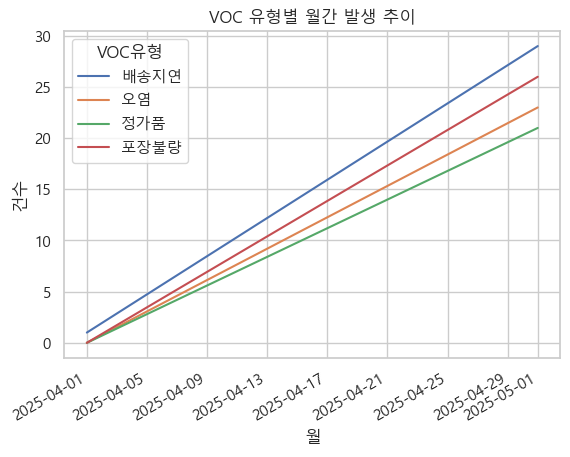

In [48]:
# 날짜 변환
voc_df["Date"] = pd.to_datetime(voc_df["Date"])

# 월별 VOC유형 카운트
voc_trend = (
    voc_df.groupby([voc_df["Date"].dt.to_period("M"), "VOC유형"])
    .size()
    .unstack()
    .fillna(0)
)
voc_trend.index = voc_trend.index.to_timestamp()

# 시각화
plt.figure(figsize=(12, 6))
voc_trend.plot()
plt.title("VOC 유형별 월간 발생 추이")
plt.xlabel("월")
plt.ylabel("건수")
plt.grid(True)
plt.show()
